In [303]:
import numpy as np

In [304]:
import pandas as pd

In [305]:
# read from csv file
df = pd.read_csv('/Users/santoshpandey/Documents/Santosh/spam_classifer/spam_detection/spam.csv', encoding='latin-1')

In [306]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2672,ham,Super msg da:)nalla timing.,NaN,NaN,NaN
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...,NaN,NaN,NaN
4088,ham,"How are you, my Love ? Are you with your broth...",NaN,NaN,NaN
752,ham,Dont gimme that lip caveboy,NaN,NaN,NaN
3119,ham,Good evening! this is roger. How are you?,NaN,NaN,NaN


In [307]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [308]:
# Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [309]:
df.sample(5)

,target,text
4412,ham,Sad story of a Man - Last week was my b'day. M...
113,spam,GENT! We are trying to contact you. Last weeke...
4449,ham,"Awesome, be there in a minute"
1225,ham,"sir, you will receive the account no another 1..."
5261,ham,I absolutely LOVE South Park! I only recently ...


In [310]:
!pip3 install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [311]:
from sklearn.preprocessing import LabelEncoder

In [312]:
encoder = LabelEncoder()

In [313]:
df['target'] = encoder.fit_transform(df['target'])

In [314]:
df.sample(5)

,target,text
768,0,I cant pick the phone right now. Pls send a me...
1158,0,Hey! There's veggie pizza... :/
1167,0,Lol now I'm after that hot air balloon!
1026,0,Yes da. Any plm at ur office
615,0,"\Happy valentines day\"" I know its early but i..."


In [315]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [316]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [317]:
df.duplicated().sum()

403

In [318]:
df = df.drop_duplicates(keep='first')

In [319]:
df.duplicated().sum()

0

In [320]:
df.shape

(5169, 2)

In [321]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [322]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


([<matplotlib.patches.Wedge at 0x155ea4c50>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

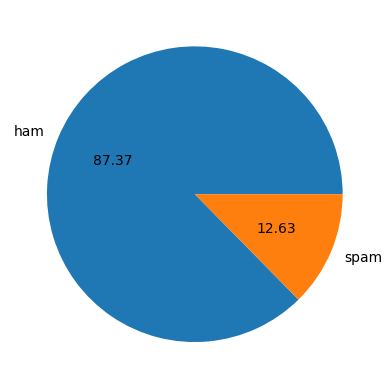

In [323]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [324]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [325]:
import nltk

In [326]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshpandey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [327]:
df['num_characters'] = df['text'].apply(len)

In [328]:
df.sample(5)

,target,text,num_characters
5097,0,Sorry about that this is my mates phone and i ...,70
5149,0,Pls call me da. What happen.,28
5378,1,Free entry to the gr8prizes wkly comp 4 a chan...,160
98,0,Hi. Wk been ok - on hols now! Yes on for a bit...,184
4226,0,Buy one egg for me da..please:),31


In [329]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [330]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [331]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [332]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [333]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [334]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [335]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

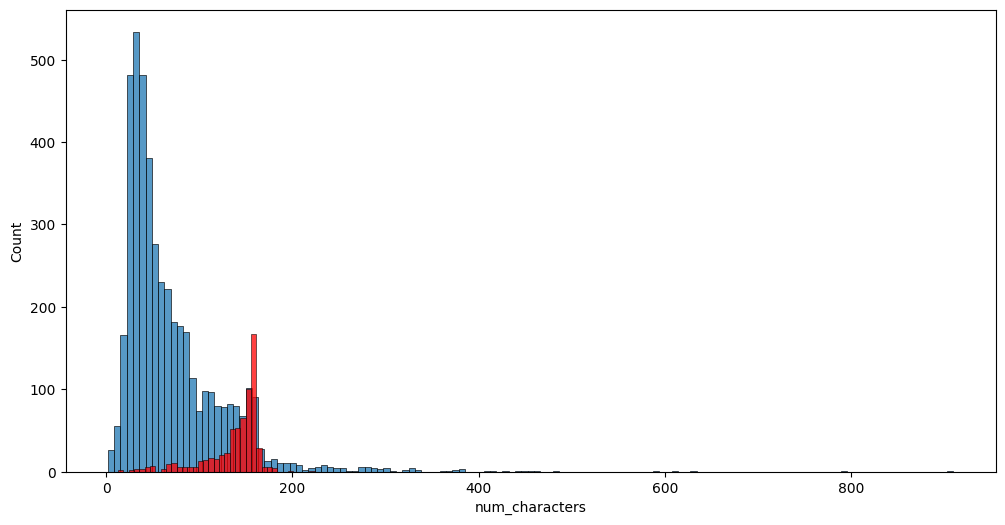

In [336]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

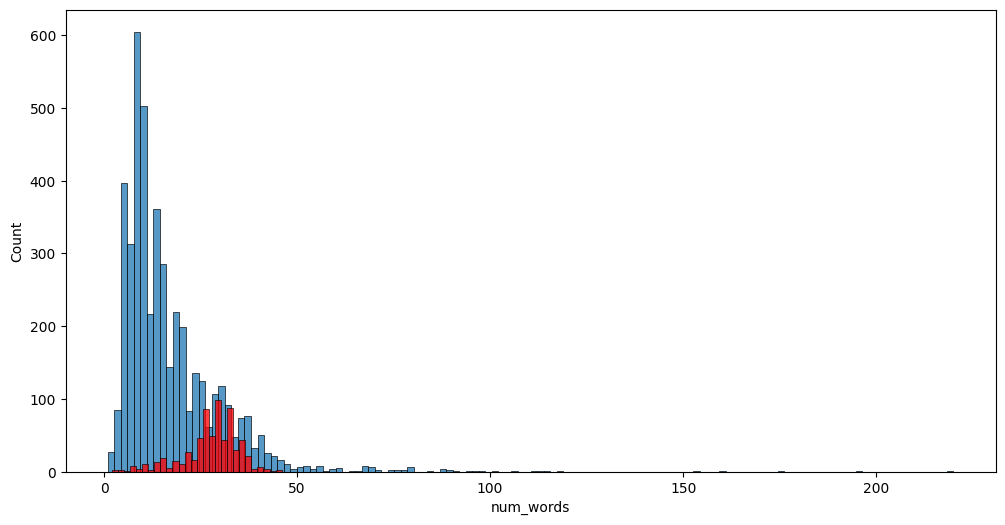

In [337]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

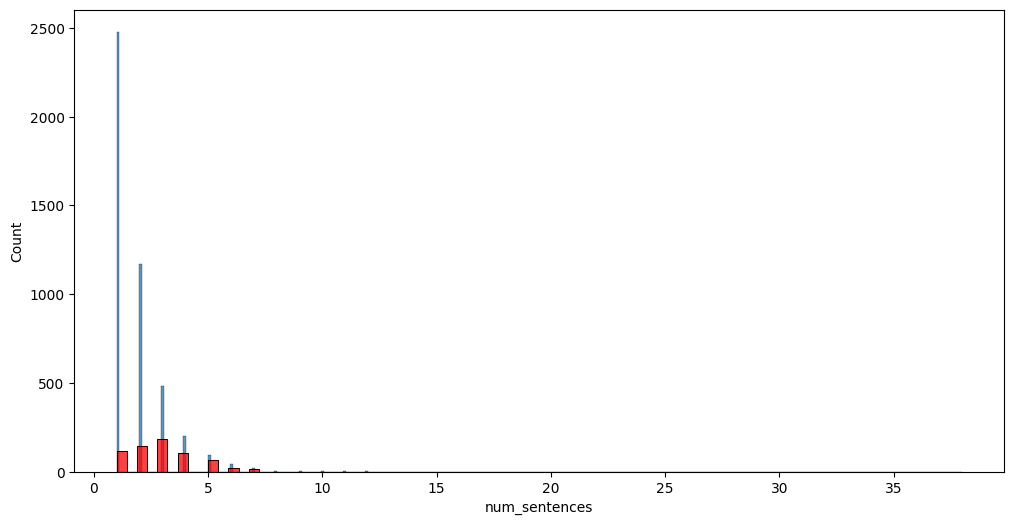

In [338]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

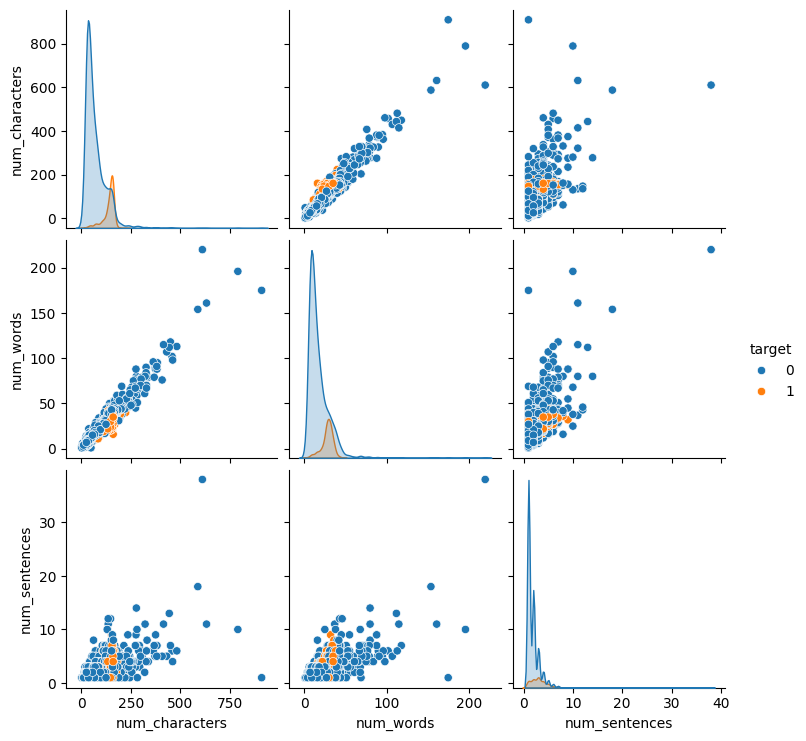

In [339]:
sns.pairplot(df, hue='target')

In [340]:
# Data Preprocessing
# 1. LowerCase
# 2. Tokenization
# 3. Remove special characters
# 4. Remove stop words and punctuation
# 5. Stemming

In [341]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santoshpandey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [342]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    filter_words = []
    for word in text:
        if word.isalnum():
            filter_words.append(word)

    result = []
    for word in filter_words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            result.append(ps.stem(word))

    return " ".join(result)

In [345]:
df['transformed_text'] = df['text'].apply(transform_text)

In [346]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [349]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/39/4a/2684863905b72fceea24edaa10e3e16bc742a184042f463f3b09883d75b0/wordcloud-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 298.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


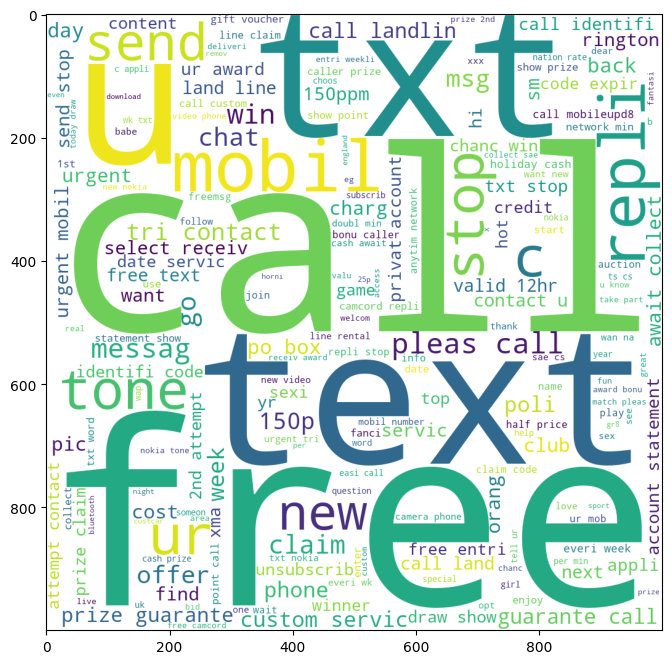

In [354]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

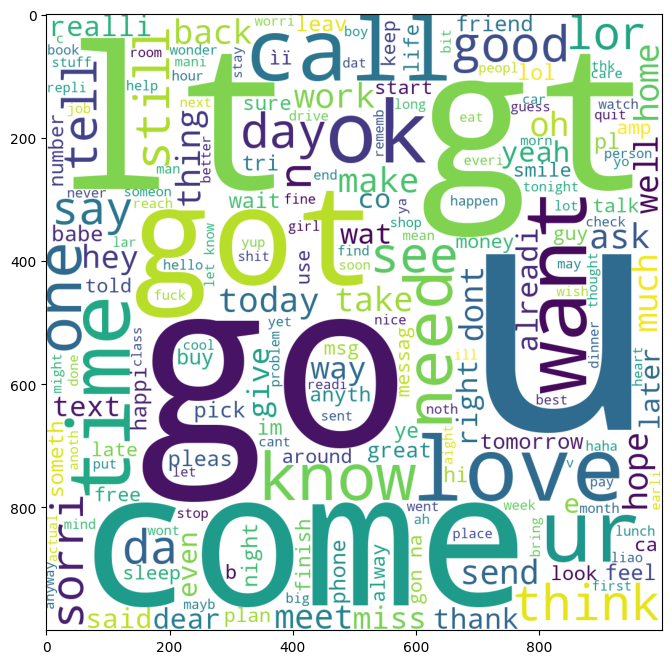

In [355]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(ham_wc)

In [363]:
# Model Building

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [365]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [368]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [370]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
